In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# **Load the Data**

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

train_data['train_test'] = 1
test_data['train_test'] = 0
test_data['Survived'] = np.NaN

# We create another variable containing the testa nd training data
all_data = pd.concat([train_data,test_data])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


# **Obtain dataset summary**

In [3]:
train_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  train_test  
0        0         A/5 21171   7.2500   NaN        S           1  
1        0          PC 17599  71.2833   C85        C           1  
2        0  STON/O2. 3101282   7.9250   NaN        S           1  
3        0            113803  53.1000  C123        S           1  
4        0            373450   8.0500   NaN        S           1  
..     ...               ...      ...   ...      ...         ...  
886      0            211536  13.0000   NaN        S           1  
887      0            112053  30.0000   B42        S           1  
888      2        W./C. 6607  23.4500   NaN        S           1  
889      0            111369  30.0000  C148        C           1  
890      0            370376   7.7500   NaN        Q           1  

[891 rows x 13 columns]

In [4]:
train_data.describe(include='all')

PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Hansen, Mr. Henrik Juul  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch Ticket        Fare        Cabin  \
count   714.000000  891.000000  891.000000    891  891.000000          204   
unique         NaN         NaN         NaN    681         NaN          147   
top            NaN         NaN         NaN   1601         NaN  C23 C25 C27   
freq           NaN         NaN         NaN      7         NaN            4   
mean     29.699118    0.523008    0.381594    NaN   32.204208          NaN   
std      14.526497    1.102743    0.806057    NaN   49.693429          NaN   
min       0.420000    0.000000    0.000000    NaN    0.000000          NaN   
25%      20.125000    0.000000    0.000000    NaN    7.910400          NaN   
50%      28.000000    0.000000    0.000000    NaN   14.454200          NaN   
75%      38.000000    1.000000    0.000000    NaN   31.000000          NaN   
max      80.000000    8.000000    6.000000    NaN  512.329200          NaN   

       Embarked  train_test  
count       889       891.0  
unique        3         NaN  
top           S         NaN  
freq        644         NaN  
mean        NaN         1.0  
std         NaN         0.0  
min         NaN         1.0  
25%         NaN         1.0  
50%         NaN         1.0  
75%         NaN         1.0  
max         NaN         1.0

# **Analyze the Distribution of Data**

This will inform us if any of the features contains outliers/skewed data. Perhaps we should normalize the skewed data

In [5]:
# We define the numerical and categorical variables
data_numeric = train_data[['Age','SibSp','Parch','Fare']]
data_cat = train_data[['Survived','Pclass','Sex','Embarked','Cabin','Ticket']]

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


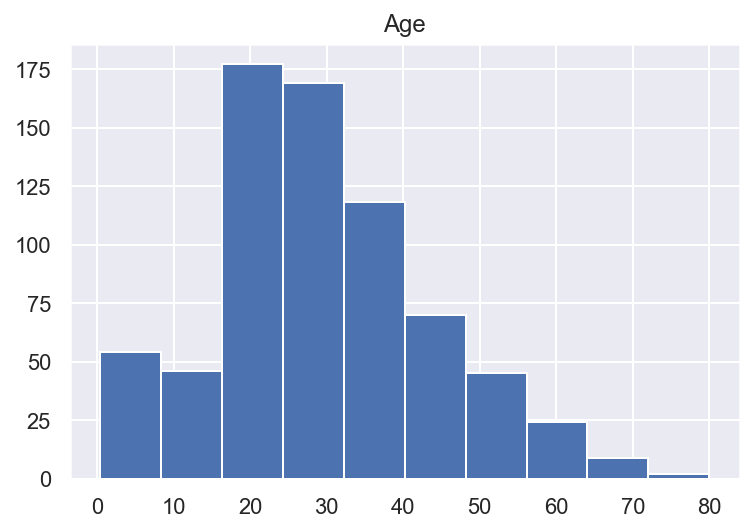

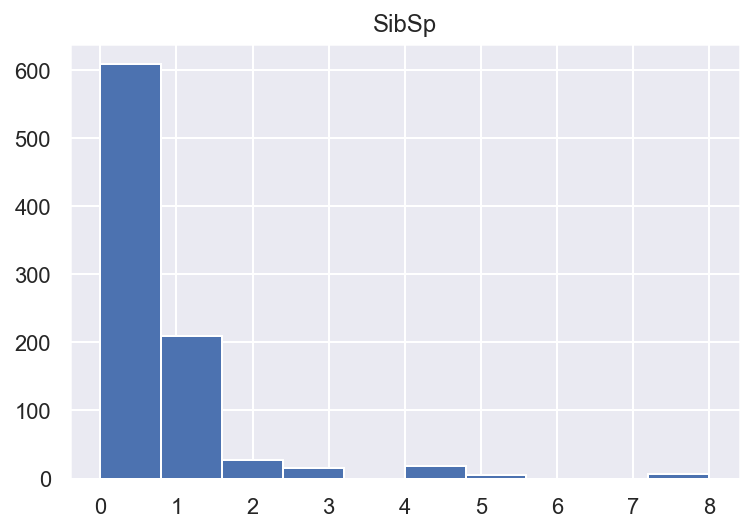

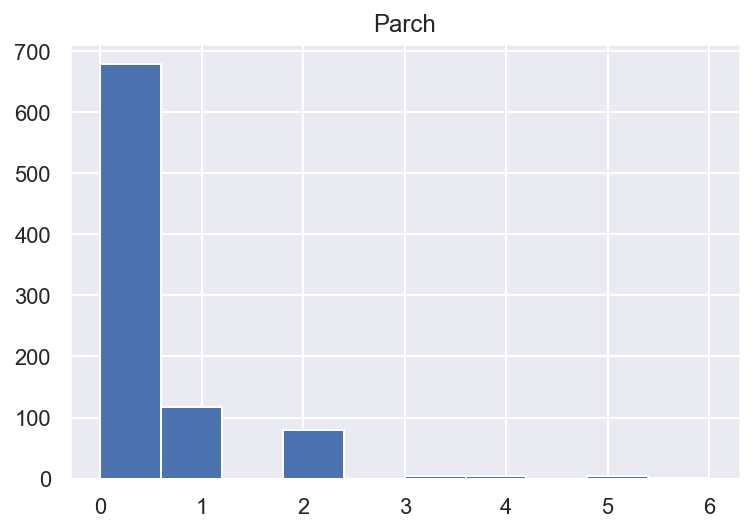

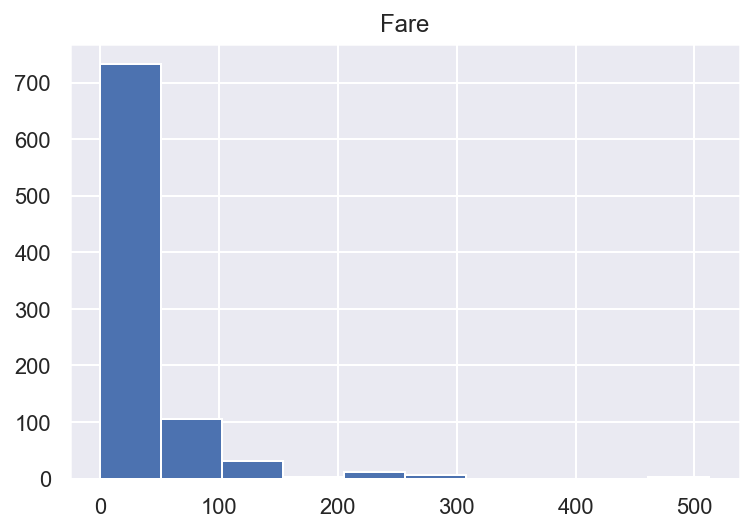

In [6]:
for i in data_numeric.columns:
    plt.hist(data_numeric[i])
    plt.title(i)
    plt.show()

We check for correlation between features and compare the survival rates across the numerical variables above

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


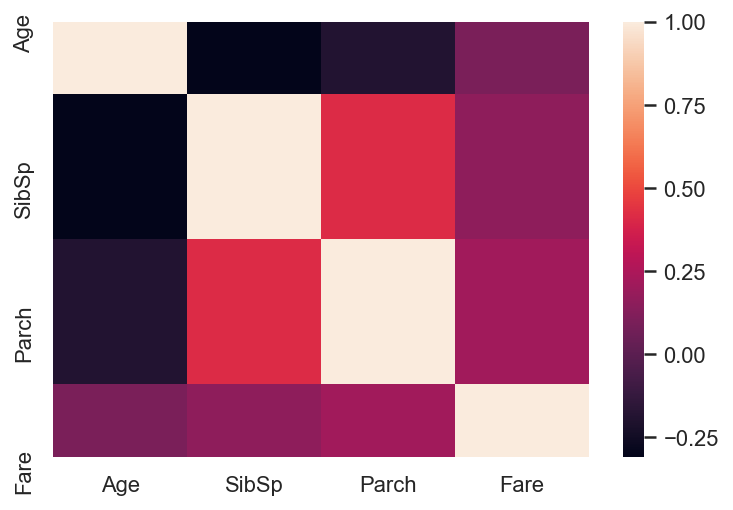

In [7]:
print(data_numeric.corr())
sns.heatmap(data_numeric.corr())

In [8]:
pd.pivot_table(data=train_data, index='Survived', values=['Age','SibSp','Parch','Fare'])

Age       Fare     Parch     SibSp
Survived                                          
0         30.626179  22.117887  0.329690  0.553734
1         28.343690  48.395408  0.464912  0.473684

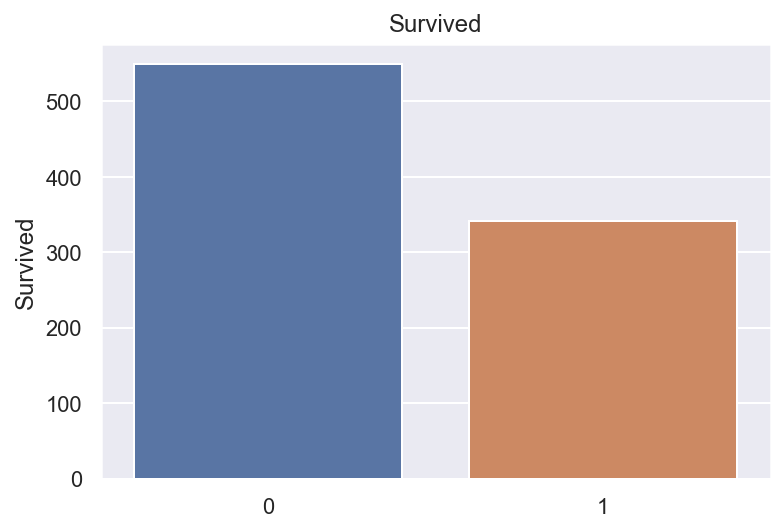

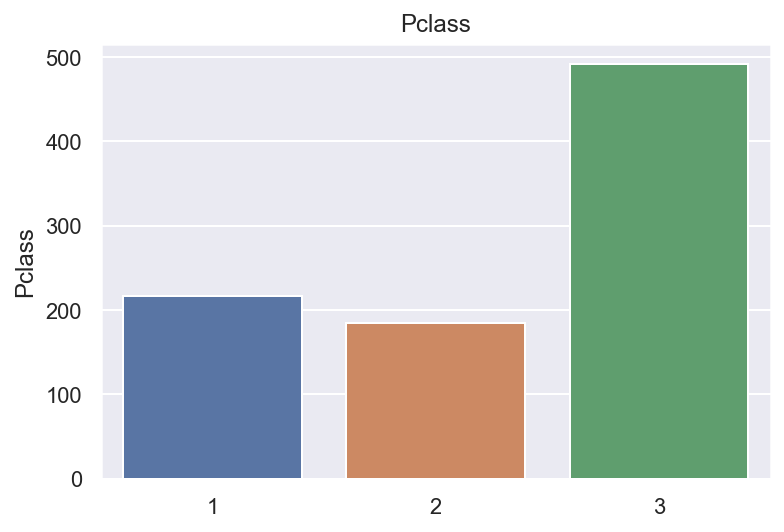

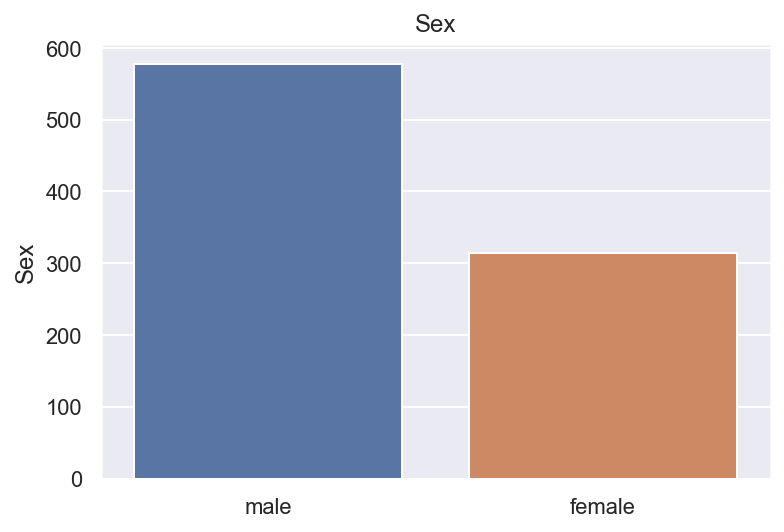

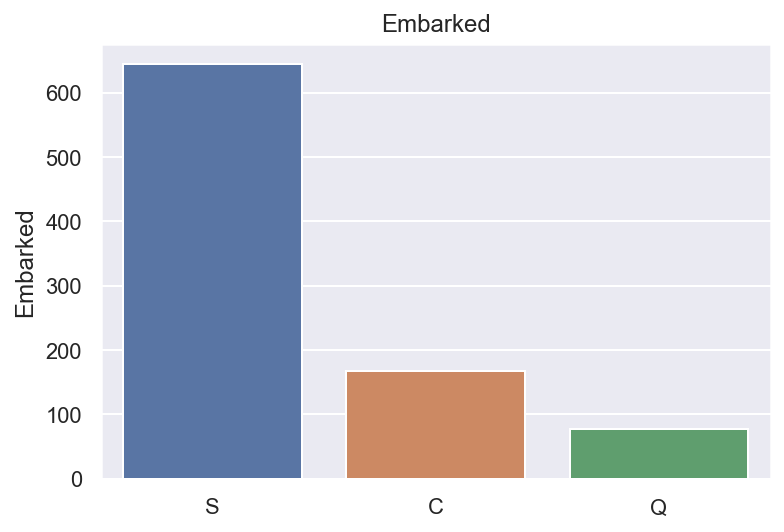

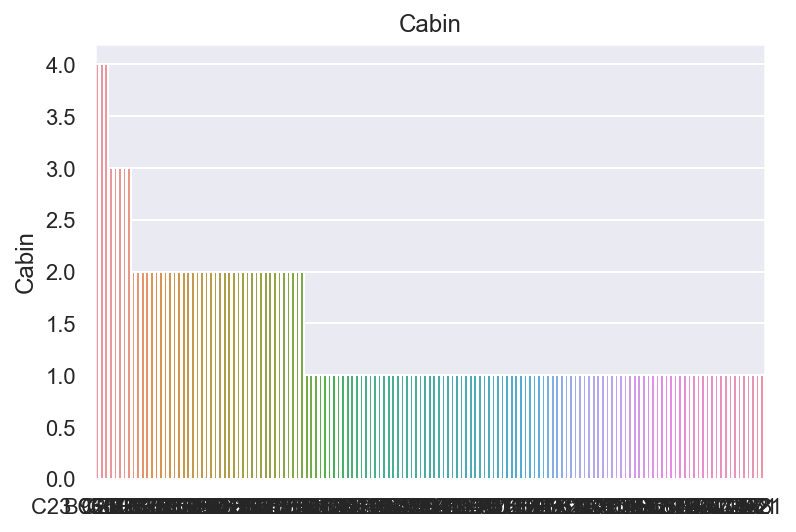

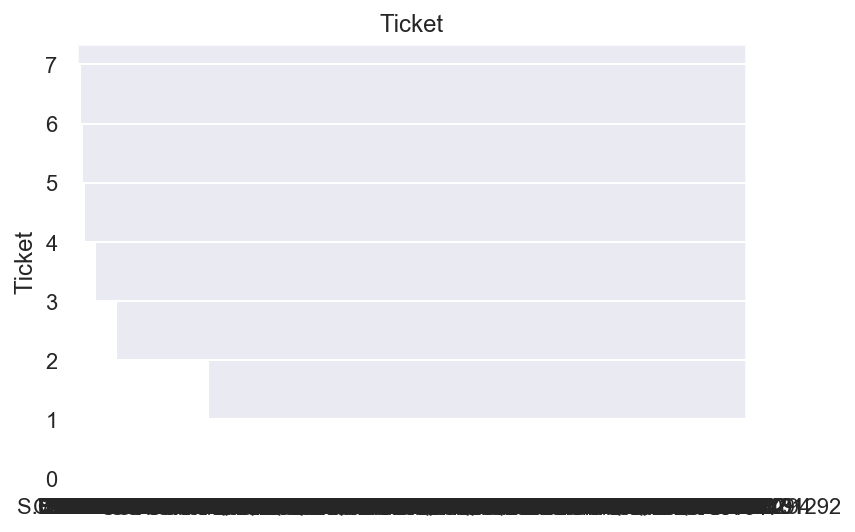

In [9]:
# We analyze the distribution of the categorical variables

for i in data_cat.columns:
    sns.barplot(data_cat[i].value_counts().index, data_cat[i].value_counts()).set_title(i)
    plt.show()

From the distribution above, we see that the Cabin and Ticket data would need some more feature engineering, so we need to explore them further. But first, to give us insight into the data, we compare the survival rates across the categorical variables

In [10]:
print(pd.pivot_table(data=train_data, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print()

print(pd.pivot_table(data=train_data, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))
print()

print(pd.pivot_table(data=train_data, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

Sex       female  male
Survived              
0             81   468
1            233   109


# **Feature Engineering**

We would be looking at the Cabin, Ticket and the Name data to extract features that we could use to train our model

Cabin - We will extract the cabin letters into a separate feature and also create a column for passengers that
purchased tickets across multiple cabins

Ticket - The ticket type(numeric/alphanumeric) and the letters contained in the ticket

Name - Does the title(reputation) of the person affect their survival rate?

### Cabin

In [11]:
# We add another feature - cabin_multiple - for passengers that purchased tickets across multiple cabins

train_data['Cabin']
train_data['Cabin_multiple'] = train_data['Cabin'].apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))

train_data['Cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin_multiple, dtype: int64

In [12]:
pd.pivot_table(data=train_data, index='Survived', columns='Cabin_multiple', values='Ticket', aggfunc='count')

Cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0

In [13]:
# We then create another feature based on the Cabin letters. As we can see in the dataset, the first letter in the 
# Cabin data holds the Cabin letter

train_data['Cabin_letter'] = train_data.Cabin.apply(lambda x: str(x)[0])
print(train_data.Cabin_letter.value_counts())

# Using the Cabin letter, we compare the survival rate across cabins

pd.pivot_table(data=train_data, index='Survived', columns='Cabin_letter', values='Ticket', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_letter, dtype: int64


Cabin_letter    A     B     C     D     E    F    G    T      n
Survived                                                       
0             8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1             7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0

### Tickets

In [14]:
# Compare numeric vs non-numeric tickets
train_data['numeric_ticket'] = train_data.Ticket.apply(lambda x:1 if x.isnumeric() else 0)

# Extract Ticket letters
train_data['ticket_letters'] = train_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() 
                                                   if len(x.split(' ')[:-1]) >0 else 0)

In [15]:
train_data.numeric_ticket.value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [16]:
train_data.ticket_letters.value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
sopp           3
pp             3
wep            3
ppp            2
swpp           2
scah           2
sotono2        2
as             1
scahbasle      1
sp             1
casoton        1
sop            1
sc             1
scow           1
fc             1
sca4           1
fa             1
Name: ticket_letters, dtype: int64

In [17]:
# We analyse the difference in survival rates between numeric and non-numeric tickets

pd.pivot_table(data=train_data, index='Survived', columns='numeric_ticket', values='Ticket', aggfunc='count')

numeric_ticket    0    1
Survived                
0               142  407
1                88  254

In [18]:
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

In [19]:
# Then the survival rate across different ticket types

pd.pivot_table(data=train_data, index='Survived', columns='ticket_letters', values='Ticket', aggfunc='count')

ticket_letters      0   a4    a5   as    c    ca  casoton   fa   fc  fcc  \
Survived                                                                   
0               410.0  7.0  19.0  1.0  3.0  27.0      1.0  1.0  1.0  1.0   
1               255.0  NaN   2.0  NaN  2.0  14.0      NaN  NaN  NaN  4.0   

ticket_letters    pc   pp  ppp   sc  sca4  scah  scahbasle  scow  scparis  \
Survived                                                                    
0               21.0  1.0  1.0  NaN   1.0   1.0        NaN   1.0      6.0   
1               39.0  2.0  1.0  1.0   NaN   1.0        1.0   NaN      5.0   

ticket_letters  soc  sop  sopp  sotono2  sotonoq   sp  stono2  swpp   wc  wep  
Survived                                                                       
0               5.0  1.0   3.0      2.0     13.0  1.0    10.0   NaN  9.0  2.0  
1               1.0  NaN   NaN      NaN      2.0  NaN     8.0   2.0  1.0  1.0

### Name

In [20]:
# Feature engineering the names of the Passengers

train_data.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  train_test  \
0      0         A/5 21171   7.2500   NaN        S           1   
1      0          PC 17599  71.2833   C85        C           1   
2      0  STON/O2. 3101282   7.9250   NaN        S           1   
3      0            113803  53.1000  C123        S           1   
4      0            373450   8.0500   NaN        S           1   
5      0            330877   8.4583   NaN        Q           1   
6      0             17463  51.8625   E46        S           1   
7      1            349909  21.0750   NaN        S           1   
8      2            347742  11.1333   NaN        S           1   
9      0            237736  30.0708   NaN        C           1   

   Cabin_multiple Cabin_letter  numeric_ticket ticket_letters  
0               0            n               0             a5  
1               1            C               0             pc  
2               0            n               0         stono2  
3               1            C               1              0  
4               0            n               1              0  
5               0            n               1              0  
6               1            E               1              0  
7               0            n               1              0  
8               0            n               1              0  
9               0            n               1              0

In [21]:
train_data['name_title'] = train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
train_data.name_title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Jonkheer          1
Lady              1
Ms                1
the Countess      1
Mme               1
Capt              1
Don               1
Sir               1
Name: name_title, dtype: int64

In [22]:
# Compare the suvrvival rates across the reputation of the passengers

pd.pivot_table(data=train_data, index='Survived', columns='name_title', values='Name', aggfunc='count')

name_title  Capt  Col  Don   Dr  Jonkheer  Lady  Major  Master   Miss  Mlle  \
Survived                                                                      
0            1.0  1.0  1.0  4.0       1.0   NaN    1.0    17.0   55.0   NaN   
1            NaN  1.0  NaN  3.0       NaN   1.0    1.0    23.0  127.0   2.0   

name_title  Mme     Mr   Mrs   Ms  Rev  Sir  the Countess  
Survived                                                   
0           NaN  436.0  26.0  NaN  6.0  NaN           NaN  
1           1.0   81.0  99.0  1.0  NaN  1.0           1.0

# **Preprocess the Dataset**

Below are the steps we will take to preprocess the dataset

1. Drop null values under the "Embarked" column(2 rows)
2. Drop the Passenger id and name columns 
3. Categorical transformation of all data(training and test)
4. Substitute mean and median values for nulls in age and Fare
5. Normalize skewed numeric data to represent a normal distribution(required for Regression Analysis which we would use)
6. Scale the data

In [23]:
# First, we create all categorical data like we did above for the training and test data

all_data['Cabin_multiple'] = all_data['Cabin'].apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
all_data['Cabin_letter'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x:1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() 
                                                   if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [24]:
# Next, we substitute median for nulls in the numeric variables
all_data['Age'] = all_data.Age.fillna(train_data.Age.median()) # Note that we used the median for the train data
all_data['Fare'] = all_data.Fare.fillna(train_data.Fare.median())

In [25]:
all_data.shape

(1309, 18)

In [26]:
# Dropping the null values under 'Embarked'
all_data.dropna(subset=['Embarked'], inplace=True)

In [27]:
all_data.shape # The two null values have been dropped(present in the training data)

(1307, 18)

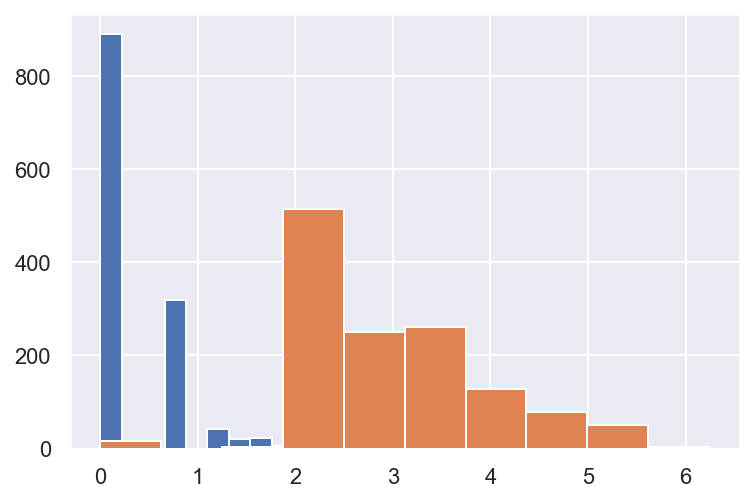

In [28]:
# For the data that doesn't follow a normal distribution above(SibSp, Fare) we do a logarithmic normalization of the 
# data

all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

In [29]:
# The Pclass will be convered to string type since it is a categorical variable
all_data.Pclass = all_data.Pclass.astype(str)

In [30]:
all_data

Age            Cabin Embarked      Fare  \
0    22.00              NaN        S    7.2500   
1    38.00              C85        C   71.2833   
2    26.00              NaN        S    7.9250   
3    35.00             C123        S   53.1000   
4    35.00              NaN        S    8.0500   
5    28.00              NaN        Q    8.4583   
6    54.00              E46        S   51.8625   
7     2.00              NaN        S   21.0750   
8    27.00              NaN        S   11.1333   
9    14.00              NaN        C   30.0708   
10    4.00               G6        S   16.7000   
11   58.00             C103        S   26.5500   
12   20.00              NaN        S    8.0500   
13   39.00              NaN        S   31.2750   
14   14.00              NaN        S    7.8542   
15   55.00              NaN        S   16.0000   
16    2.00              NaN        Q   29.1250   
17   28.00              NaN        S   13.0000   
18   31.00              NaN        S   18.0000   
19   28.00              NaN        C    7.2250   
20   35.00              NaN        S   26.0000   
21   34.00              D56        S   13.0000   
22   15.00              NaN        Q    8.0292   
23   28.00               A6        S   35.5000   
24    8.00              NaN        S   21.0750   
25   38.00              NaN        S   31.3875   
26   28.00              NaN        C    7.2250   
27   19.00      C23 C25 C27        S  263.0000   
28   28.00              NaN        Q    7.8792   
29   28.00              NaN        S    7.8958   
30   40.00              NaN        C   27.7208   
31   28.00              B78        C  146.5208   
32   28.00              NaN        Q    7.7500   
33   66.00              NaN        S   10.5000   
34   28.00              NaN        C   82.1708   
35   42.00              NaN        S   52.0000   
36   28.00              NaN        C    7.2292   
37   21.00              NaN        S    8.0500   
38   18.00              NaN        S   18.0000   
39   14.00              NaN        C   11.2417   
40   40.00              NaN        S    9.4750   
41   27.00              NaN        S   21.0000   
42   28.00              NaN        C    7.8958   
43    3.00              NaN        C   41.5792   
44   19.00              NaN        Q    7.8792   
45   28.00              NaN        S    8.0500   
46   28.00              NaN        Q   15.5000   
47   28.00              NaN        Q    7.7500   
48   28.00              NaN        C   21.6792   
49   18.00              NaN        S   17.8000   
50    7.00              NaN        S   39.6875   
51   21.00              NaN        S    7.8000   
52   49.00              D33        C   76.7292   
53   29.00              NaN        S   26.0000   
54   65.00              B30        C   61.9792   
55   28.00              C52        S   35.5000   
56   21.00              NaN        S   10.5000   
57   28.50              NaN        C    7.2292   
58    5.00              NaN        S   27.7500   
59   11.00              NaN        S   46.9000   
60   22.00              NaN        C    7.2292   
62   45.00              C83        S   83.4750   
63    4.00              NaN        S   27.9000   
64   28.00              NaN        C   27.7208   
65   28.00              NaN        C   15.2458   
66   29.00              F33        S   10.5000   
67   19.00              NaN        S    8.1583   
68   17.00              NaN        S    7.9250   
69   26.00              NaN        S    8.6625   
70   32.00              NaN        S   10.5000   
71   16.00              NaN        S   46.9000   
72   21.00              NaN        S   73.5000   
73   26.00              NaN        C   14.4542   
74   32.00              NaN        S   56.4958   
75   25.00            F G73        S    7.6500   
76   28.00              NaN        S    7.8958   
77   28.00              NaN        S    8.0500   
78    0.83              NaN        S   29.0000   
79   30.00              NaN        S   12.4750   
80   22

In [32]:
# Now we create dummies for our categorical variables

all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare',
                                       'Embarked','Cabin_letter','Cabin_multiple','numeric_ticket',
                                       'name_title','train_test']])

# We then split the data into training and test data again

x_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis=1)
x_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis=1)

In [34]:
# We also specify our target

y_train = all_data[all_data.train_test == 1].Survived
y_train.shape

(889,)

In [35]:
all_dummies

Age  SibSp  Parch  norm_fare  Cabin_multiple  numeric_ticket  \
0    22.00      1      0   2.110213               0               0   
1    38.00      1      0   4.280593               1               0   
2    26.00      0      0   2.188856               0               0   
3    35.00      1      0   3.990834               1               1   
4    35.00      0      0   2.202765               0               1   
5    28.00      0      0   2.246893               0               1   
6    54.00      0      0   3.967694               1               1   
7     2.00      3      1   3.094446               0               1   
8    27.00      0      2   2.495954               0               1   
9    14.00      1      0   3.436268               0               1   
10    4.00      1      1   2.873565               1               0   
11   58.00      0      0   3.316003               1               1   
12   20.00      0      0   2.202765               0               0   
13   39.00      1      5   3.474293               0               1   
14   14.00      0      0   2.180892               0               1   
15   55.00      0      0   2.833213               0               1   
16    2.00      4      1   3.405355               0               1   
17   28.00      0      0   2.639057               0               1   
18   31.00      1      0   2.944439               0               1   
19   28.00      0      0   2.107178               0               1   
20   35.00      0      0   3.295837               0               1   
21   34.00      0      0   2.639057               1               1   
22   15.00      0      0   2.200464               0               1   
23   28.00      0      0   3.597312               1               1   
24    8.00      3      1   3.094446               0               1   
25   38.00      1      5   3.477773               0               1   
26   28.00      0      0   2.107178               0               1   
27   19.00      3      2   5.575949               3               1   
28   28.00      0      0   2.183711               0               1   
29   28.00      0      0   2.185579               0               1   
30   40.00      0      0   3.357622               0               0   
31   28.00      1      0   4.993969               1               0   
32   28.00      0      0   2.169054               0               1   
33   66.00      0      0   2.442347               0               0   
34   28.00      1      0   4.420896               0               0   
35   42.00      1      0   3.970292               0               1   
36   28.00      0      0   2.107689               0               1   
37   21.00      0      0   2.202765               0               0   
38   18.00      2      0   2.944439               0               1   
39   14.00      1      0   2.504848               0               1   
40   40.00      1      0   2.348991               0               1   
41   27.00      1      0   3.091042               0               1   
42   28.00      0      0   2.185579               0               1   
43    3.00      1      2   3.751366               0               0   
44   19.00      0      0   2.183711               0               1   
45   28.00      0      0   2.202765               0               0   
46   28.00      1      0   2.803360               0               1   
47   28.00      0      0   2.169054               0               1   
48   28.00      2      0   3.121448               0               1   
49   18.00      1      0   2.933857               0               1   
50    7.00      4      1   3.705921               0               1   
51   21.00      0      0   2.174752               0               0   
52   49.00      1      0   4.353231               1               0   
53   29.00      1      0   3.295837               0               1   
54   65.00      0      1   4.142805               1               1   
55   28.00      0      0   3.59

In [36]:
# Scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
all_dummies_scaled = all_dummies.copy()

all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']] = scaler.fit_transform(all_dummies_scaled[['Age','SibSp'
                                                                                                     ,'Parch','norm_fare']])

all_dummies_scaled

Age     SibSp     Parch  norm_fare  Cabin_multiple  numeric_ticket  \
0   -0.580261  0.480272 -0.445407  -0.896331               0               0   
1    0.662297  0.480272 -0.445407   1.347870               1               0   
2   -0.269621 -0.479537 -0.445407  -0.815013               0               0   
3    0.429318  0.480272 -0.445407   1.048255               1               1   
4    0.429318 -0.479537 -0.445407  -0.800632               0               1   
5   -0.114301 -0.479537 -0.445407  -0.755003               0               1   
6    1.904855 -0.479537 -0.445407   1.024328               1               1   
7   -2.133458  2.399890  0.709647   0.121378               0               1   
8   -0.191961 -0.479537  1.864701  -0.497471               0               1   
9   -1.201540  0.480272 -0.445407   0.474827               0               1   
10  -1.978138  0.480272  0.709647  -0.107016               1               0   
11   2.215495 -0.479537 -0.445407   0.350470               1               1   
12  -0.735580 -0.479537 -0.445407  -0.800632               0               0   
13   0.739957  0.480272  5.329864   0.514145               0               1   
14  -1.201540 -0.479537 -0.445407  -0.823249               0               1   
15   1.982515 -0.479537 -0.445407  -0.148740               0               1   
16  -2.133458  3.359699  0.709647   0.442862               0               1   
17  -0.114301 -0.479537 -0.445407  -0.349500               0               1   
18   0.118678  0.480272 -0.445407  -0.033731               0               1   
19  -0.114301 -0.479537 -0.445407  -0.899470               0               1   
20   0.429318 -0.479537 -0.445407   0.329619               0               1   
21   0.351658 -0.479537 -0.445407  -0.349500               1               1   
22  -1.123880 -0.479537 -0.445407  -0.803011               0               1   
23  -0.114301 -0.479537 -0.445407   0.641348               1               1   
24  -1.667499  2.399890  0.709647   0.121378               0               1   
25   0.662297  0.480272  5.329864   0.517743               0               1   
26  -0.114301 -0.479537 -0.445407  -0.899470               0               1   
27  -0.813240  2.399890  1.864701   2.687285               3               1   
28  -0.114301 -0.479537 -0.445407  -0.820333               0               1   
29  -0.114301 -0.479537 -0.445407  -0.818402               0               1   
30   0.817617 -0.479537 -0.445407   0.393505               0               0   
31  -0.114301  0.480272 -0.445407   2.085510               1               0   
32  -0.114301 -0.479537 -0.445407  -0.835490               0               1   
33   2.836774 -0.479537 -0.445407  -0.552901               0               0   
34  -0.114301  0.480272 -0.445407   1.492945               0               0   
35   0.972937  0.480272 -0.445407   1.027014               0               1   
36  -0.114301 -0.479537 -0.445407  -0.898942               0               1   
37  -0.657921 -0.479537 -0.445407  -0.800632               0               0   
38  -0.890900  1.440081 -0.445407  -0.033731               0               1   
39  -1.201540  0.480272 -0.445407  -0.488274               0               1   
40   0.817617  0.480272 -0.445407  -0.649432               0               1   
41  -0.191961  0.480272 -0.445407   0.117859               0               1   
42  -0.114301 -0.479537 -0.445407  -0.818402               0               1   
43  -2.055798  0.480272  1.864701   0.800642               0               0   
44  -0.813240 -0.479537 -0.445407  -0.820333               0               1   
45  -0.114301 -0.479537 -0.445407  -0.800632               0               0   
46  -0.114301  0.480272 -0.445407  -0.179608               0               1   
47  -0.114301 -0.479537 -0.445407  -0.835490               0               1   
48  -0.114301  1.440081 -0.445407   0.149299               0               1   
49  -0.890

In [37]:
x_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
x_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

# **Model Training**

In [38]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(x_train_scaled, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
log_model.score(x_train_scaled, y_train)

0.8380202474690663

In [40]:
log_model.coef_

array([[-3.91507740e-01, -6.00282195e-01, -3.37696123e-01,
         4.04007922e-01,  8.49821618e-02,  2.05987004e-02,
         4.76947814e-01,  3.47552875e-01, -4.99218316e-01,
         1.09279336e+00, -7.67510987e-01,  2.65678792e-01,
         2.02799254e-01, -1.43195674e-01,  2.04865488e-02,
         1.96947238e-01, -2.38257135e-01,  6.19386204e-01,
         9.40419330e-01,  1.10891906e-01, -5.52870810e-01,
        -2.56803199e-01, -5.14917711e-01, -2.19648574e-01,
         9.89460202e-02, -4.12620298e-01,  0.00000000e+00,
        -2.69861440e-01, -1.40146452e-01,  1.18208465e-01,
        -1.72834693e-03,  1.83940033e+00, -7.04662173e-02,
         6.93500085e-02,  2.63616526e-02, -1.02465027e+00,
         6.40212990e-01,  1.63385889e-01, -9.12400375e-01,
         3.75998531e-01,  4.49404572e-02]])

In [41]:
log_model.intercept_

array([0.32528237])

# **Summary Table**

The summary table will show us the Features of the dataset and their respective coefficients/weights

In [42]:
features = x_train_scaled.columns.values
summary_table = pd.DataFrame(columns=['Features'], data=features)
summary_table['coefficients'] = np.transpose(log_model.coef_) # nd arrays are rows by default so we transpose the data

summary_table

Features  coefficients
0                       Age     -0.391508
1                     SibSp     -0.600282
2                     Parch     -0.337696
3                 norm_fare      0.404008
4            Cabin_multiple      0.084982
5            numeric_ticket      0.020599
6                  Pclass_1      0.476948
7                  Pclass_2      0.347553
8                  Pclass_3     -0.499218
9                Sex_female      1.092793
10                 Sex_male     -0.767511
11               Embarked_C      0.265679
12               Embarked_Q      0.202799
13               Embarked_S     -0.143196
14           Cabin_letter_A      0.020487
15           Cabin_letter_B      0.196947
16           Cabin_letter_C     -0.238257
17           Cabin_letter_D      0.619386
18           Cabin_letter_E      0.940419
19           Cabin_letter_F      0.110892
20           Cabin_letter_G     -0.552871
21           Cabin_letter_T     -0.256803
22           Cabin_letter_n     -0.514918
23          name_title_Capt     -0.219649
24           name_title_Col      0.098946
25           name_title_Don     -0.412620
26          name_title_Dona      0.000000
27            name_title_Dr     -0.269861
28      name_title_Jonkheer     -0.140146
29          name_title_Lady      0.118208
30         name_title_Major     -0.001728
31        name_title_Master      1.839400
32          name_title_Miss     -0.070466
33          name_title_Mlle      0.069350
34           name_title_Mme      0.026362
35            name_title_Mr     -1.024650
36           name_title_Mrs      0.640213
37            name_title_Ms      0.163386
38           name_title_Rev     -0.912400
39           name_title_Sir      0.375999
40  name_title_the Countess      0.044940

In [43]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', log_model.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

Features  coefficients
0                 Intercept      0.325282
1                       Age     -0.391508
2                     SibSp     -0.600282
3                     Parch     -0.337696
4                 norm_fare      0.404008
5            Cabin_multiple      0.084982
6            numeric_ticket      0.020599
7                  Pclass_1      0.476948
8                  Pclass_2      0.347553
9                  Pclass_3     -0.499218
10               Sex_female      1.092793
11                 Sex_male     -0.767511
12               Embarked_C      0.265679
13               Embarked_Q      0.202799
14               Embarked_S     -0.143196
15           Cabin_letter_A      0.020487
16           Cabin_letter_B      0.196947
17           Cabin_letter_C     -0.238257
18           Cabin_letter_D      0.619386
19           Cabin_letter_E      0.940419
20           Cabin_letter_F      0.110892
21           Cabin_letter_G     -0.552871
22           Cabin_letter_T     -0.256803
23           Cabin_letter_n     -0.514918
24          name_title_Capt     -0.219649
25           name_title_Col      0.098946
26           name_title_Don     -0.412620
27          name_title_Dona      0.000000
28            name_title_Dr     -0.269861
29      name_title_Jonkheer     -0.140146
30          name_title_Lady      0.118208
31         name_title_Major     -0.001728
32        name_title_Master      1.839400
33          name_title_Miss     -0.070466
34          name_title_Mlle      0.069350
35           name_title_Mme      0.026362
36            name_title_Mr     -1.024650
37           name_title_Mrs      0.640213
38            name_title_Ms      0.163386
39           name_title_Rev     -0.912400
40           name_title_Sir      0.375999
41  name_title_the Countess      0.044940

In [44]:
# Since logistic regression deals with the log(odds), we can calculate the odds ratio of the coefficients to 
# determine which coefficients have the highest weights

summary_table['odds_ratio'] = np.exp(summary_table.coefficients)
summary_table = summary_table.sort_values(['odds_ratio'], ascending=False)
summary_table

Features  coefficients  odds_ratio
32        name_title_Master      1.839400    6.292764
10               Sex_female      1.092793    2.982594
19           Cabin_letter_E      0.940419    2.561055
37           name_title_Mrs      0.640213    1.896885
18           Cabin_letter_D      0.619386    1.857787
7                  Pclass_1      0.476948    1.611149
4                 norm_fare      0.404008    1.497816
40           name_title_Sir      0.375999    1.456445
8                  Pclass_2      0.347553    1.415599
0                 Intercept      0.325282    1.384422
12               Embarked_C      0.265679    1.304316
13               Embarked_Q      0.202799    1.224827
16           Cabin_letter_B      0.196947    1.217680
38            name_title_Ms      0.163386    1.177491
30          name_title_Lady      0.118208    1.125479
20           Cabin_letter_F      0.110892    1.117274
25           name_title_Col      0.098946    1.104007
5            Cabin_multiple      0.084982    1.088698
34          name_title_Mlle      0.069350    1.071811
41  name_title_the Countess      0.044940    1.045966
35           name_title_Mme      0.026362    1.026712
6            numeric_ticket      0.020599    1.020812
15           Cabin_letter_A      0.020487    1.020698
27          name_title_Dona      0.000000    1.000000
31         name_title_Major     -0.001728    0.998273
33          name_title_Miss     -0.070466    0.931959
29      name_title_Jonkheer     -0.140146    0.869231
14               Embarked_S     -0.143196    0.866584
24          name_title_Capt     -0.219649    0.802801
17           Cabin_letter_C     -0.238257    0.788000
22           Cabin_letter_T     -0.256803    0.773520
28            name_title_Dr     -0.269861    0.763485
3                     Parch     -0.337696    0.713412
1                       Age     -0.391508    0.676037
26           name_title_Don     -0.412620    0.661914
9                  Pclass_3     -0.499218    0.607005
23           Cabin_letter_n     -0.514918    0.597550
21           Cabin_letter_G     -0.552871    0.575296
2                     SibSp     -0.600282    0.548657
11                 Sex_male     -0.767511    0.464167
39           name_title_Rev     -0.912400    0.401559
36            name_title_Mr     -1.024650    0.358922

# **Testing the Model**

In [46]:
x_test_scaled

Age     SibSp     Parch  norm_fare  Cabin_multiple  numeric_ticket  \
0    0.390488 -0.479537 -0.445407  -0.826172               0               1   
1    1.361236  0.480272 -0.445407  -0.928150               0               1   
2    2.526134 -0.479537 -0.445407  -0.628665               0               1   
3   -0.191961 -0.479537 -0.445407  -0.732917               0               1   
4   -0.580261  0.480272  0.709647  -0.403510               0               1   
5   -1.201540 -0.479537 -0.445407  -0.674409               0               1   
6    0.041018 -0.479537 -0.445407  -0.849864               0               1   
7   -0.269621  0.480272  0.709647   0.438563               0               1   
8   -0.890900 -0.479537 -0.445407  -0.898942               0               1   
9   -0.657921  1.440081 -0.445407   0.256226               0               0   
10  -0.114301 -0.479537 -0.445407  -0.818402               0               1   
11   1.283576 -0.479537 -0.445407   0.329619               0               1   
12  -0.502601  0.480272 -0.445407   1.494137               1               1   
13   2.603794  0.480272 -0.445407   0.329619               0               1   
14   1.361236  0.480272 -0.445407   1.192106               1               0   
15  -0.424941  0.480272 -0.445407   0.393505               0               0   
16   0.429318 -0.479537 -0.445407  -0.398658               0               1   
17  -0.657921 -0.479537 -0.445407  -0.899470               0               1   
18  -0.191961  0.480272 -0.445407  -0.815013               0               0   
19   1.205916 -0.479537 -0.445407  -0.899470               0               1   
20   1.982515  0.480272 -0.445407   1.162157               0               0   
21  -1.589839 -0.479537  0.709647  -1.601637               0               0   
22  -0.114301 -0.479537 -0.445407   0.527144               0               0   
23  -0.657921 -0.479537  0.709647   1.195496               0               0   
24   1.438896  0.480272  3.019756   2.684834               4               0   
25   1.594216  0.480272 -0.445407  -0.244255               0               0   
26  -0.580261 -0.479537  0.709647   1.205394               1               1   
27  -0.541431 -0.479537 -0.445407  -0.899470               0               1   
28   0.895277 -0.479537 -0.445407   0.489013               1               1   
29  -0.114301  1.440081 -0.445407   0.149299               0               1   
30   1.594216  0.480272 -0.445407   0.329619               0               0   
31  -0.424941  1.440081 -0.445407   0.521328               0               0   
32   0.273998  0.480272  1.864701   0.097688               0               0   
33  -0.114301  0.480272  1.864701   0.227038               0               0   
34   0.041018  0.480272 -0.445407   1.133517               1               1   
35  -0.852070 -0.479537 -0.445407  -0.898942               0               1   
36  -0.114301 -0.479537 -0.445407  -0.800632               0               1   
37  -0.657921 -0.479537 -0.445407  -0.732917               0               1   
38  -0.347281 -0.479537 -0.445407  -0.646967               0               1   
39  -0.114301 -0.479537 -0.445407   1.111204               0               1   
40   0.739957 -0.479537  0.709647  -0.319172               0               1   
41  -0.114301 -0.479537 -0.445407   0.350470               1               1   
42   0.895277 -0.479537 -0.445407  -0.823739               0               0   
43   0.041018 -0.479537 -0.445407  -0.349500               0               1   
44   1.205916  0.480272 -0.445407   1.037770               1               1   
45  -0.347281 -0.479537 -0.445407  -0.815013               0               0   
46   1.205916 -0.479537 -0.445407   0.462413               1               0   
47  -0.114301 -0.479537 -0.445407  -0.835490               0               1   
48   2.370814 -0.479537 -0.445407   1.417142               1               1   
49   0.506

In [47]:
prediction = log_model.predict(x_test_scaled)
prediction

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

# **Create a predictions table**

In [49]:
passengers = test_data['PassengerId']
pred_summary = pd.DataFrame(columns=['PassengerId'], data=passengers)
pred_summary

PassengerId
0            892
1            893
2            894
3            895
4            896
5            897
6            898
7            899
8            900
9            901
10           902
11           903
12           904
13           905
14           906
15           907
16           908
17           909
18           910
19           911
20           912
21           913
22           914
23           915
24           916
25           917
26           918
27           919
28           920
29           921
30           922
31           923
32           924
33           925
34           926
35           927
36           928
37           929
38           930
39           931
40           932
41           933
42           934
43           935
44           936
45           937
46           938
47           939
48           940
49           941
50           942
51           943
52           944
53           945
54           946
55           947
56           948
57           949
58           950
59           951
60           952
61           953
62           954
63           955
64           956
65           957
66           958
67           959
68           960
69           961
70           962
71           963
72           964
73           965
74           966
75           967
76           968
77           969
78           970
79           971
80           972
81           973
82           974
83           975
84           976
85           977
86           978
87           979
88           980
89           981
90           982
91           983
92           984
93           985
94           986
95           987
96           988
97           989
98           990
99           991
100          992
101          993
102          994
103          995
104          996
105          997
106          998
107          999
108         1000
109         1001
110         1002
111         1003
112         1004
113         1005
114         1006
115         1007
116         1008
117         1009
118         1010
119         1011
120         1012
121         1013
122         1014
123         1015
124         1016
125         1017
126         1018
127         1019
128         1020
129         1021
130         1022
131         1023
132         1024
133         1025
134         1026
135         1027
136         1028
137         1029
138         1030
139         1031
140         1032
141         1033
142         1034
143         1035
144         1036
145         1037
146         1038
147         1039
148         1040
149         1041
150         1042
151         1043
152         1044
153         1045
154         1046
155         1047
156         1048
157         1049
158         1050
159         1051
160         1052
161         1053
162         1054
163         1055
164         1056
165         1057
166         1058
167         1059
168         1060
169         1061
170         1062
171         1063
172         1064
173         1065
174         1066
175         1067
176         1068
177         1069
178         1070
179         1071
180         1072
181         1073
182         1074
183         1075
184         1076
185         1077
186         1078
187         1079
188         1080
189         1081
190         1082
191         1083
192         1084
193         1085
194         1086
195         1087
196         1088
197         1089
198         1090
199         1091
200         1092
201         1093
202         1094
203         1095
204         1096
205         1097
206         1098
207         1099
208         1100
209         1101
210         1102
211         1103
212         1104
213         1105
214         1106
215         1107
216         1108
217         1109
218         1110
219         1111
220         1112
221         1113
222         1114
223         1115
224         1116
225         1117
226         1118
227         1119
228         1120
229         1121
230         1122
231         1123
232         1124
233         1125
234       

In [51]:
pred_summary['Survived'] = prediction.astype(int)
pred_summary

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         1
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
30           922         0
31           923         0
32           924         0
33           925         1
34           926         0
35           927         0
36           928         1
37           929         1
38           930         0
39           931         0
40           932         0
41           933         1
42           934         0
43           935         1
44           936         1
45           937         0
46           938         0
47           939         0
48           940         1
49           941         1
50           942         0
51           943         0
52           944         1
53           945         1
54           946         0
55           947         0
56           948         0
57           949         0
58           950         0
59           951         1
60           952         0
61           953         0
62           954         0
63           955         1
64           956         1
65           957         1
66           958         1
67           959         0
68           960         0
69           961         1
70           962         1
71           963         0
72           964         1
73           965         1
74           966         1
75           967         1
76           968         0
77           969         1
78           970         0
79           971         1
80           972         1
81           973         0
82           974         0
83           975         0
84           976         0
85           977         0
86           978         1
87           979         1
88           980         1
89           981         1
90           982         1
91           983         0
92           984         1
93           985         0
94           986         0
95           987         0
96           988         1
97           989         0
98           990         1
99           991         0
100          992         1
101          993         0
102          994         0
103          995         0
104          996         1
105          997         0
106          998         0
107          999         0
108         1000         0
109         1001         0
110         1002         0
111         1003         1
112         1004         1
113         1005         1
114         1006         1
115         1007         0
116         1008         0
117         1009         1
118         1010         0
119         1011         1
120         1012         1
121         1013         0
122         1014         1
123         1015         0
124         1016         0
125         1017         1
126         1018         0
127         1019         0
128         1020         0
129         1021         0
130         1022         0
131         1023         1
132         1024         0
133         1025         0
134         1026         0
135         1027         0
136         1028         0
137         1029         0
138         1030         1
139         1031         0
140         1032         0
141         1033         1
142         1034         0
143         1035         0
144         1036         0
145         1037         0
146         1038         1
147      

In [52]:
pred_summary.to_csv('titanic_prediction_improved.csv', index=False)